# Time Value of Money

The **time value of money** means that a person places a higher value on a dollar in one point in time than on the same dollar at a different point in time.

- Are you willing to give me $\$100$ today if I give you $\$100$ in one year? 
- Why or why not? 
- **Risk:** Can you trust that you will get the $\$100$ back?
- **Availability of Capital:** What if you don’t have the $\$100$ to give me?

## Notation

In mathematically describing the time value of money, we'll use the following notation.

$$P=\mbox{present value}$$
$$F=\mbox{future value}$$
$$N=\mbox{number of periods of investment}$$
$$i=\mbox{interest rate per period}$$


## Growth With Simple Interest

In the simplest case, the future value of money grows linearly with the number of periods invested.

$$F=P(1+iN)$$

In [1]:
def F_simple(P, i, N):
    '''Growth with simple interest'''
    return P*(1+i*N)

In [3]:
# example
P=100  # You give me $100
i=0.10 # at 10 percent interest per period
N=10   # it takes me 10 periods to pay it back

In [26]:
print("You give me $"+str(P)+" today, but after " + str(N) +
      " years at an interest rate of " + str(i) + ", I will owe you:")
print(F_simple(P, i, N))

You give me $100 today, but after 10 years at an interest rate of 0.1, I will owe you:
200.0


### Question: What kind of function is the simple growth equation?

Recall the equation for F(P, i, N) above. With this simple interest growth type, the future value (the amount owed, in this case) is what kind of function of time (N)?

- linear
- quadratic
- logrithmic
- exponential

<IPython.core.display.Javascript object>


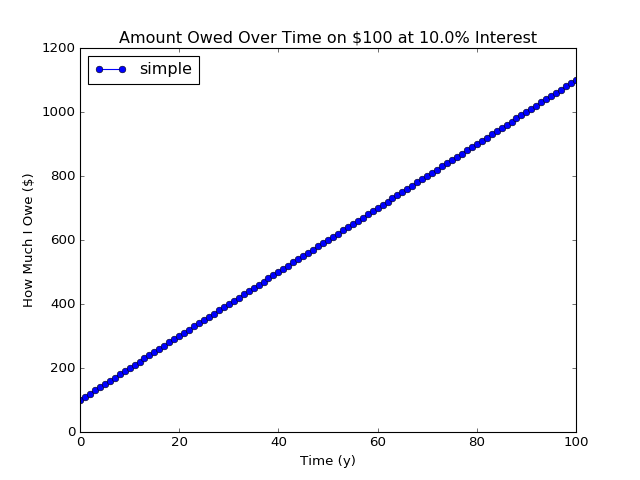

In [38]:
# The magic below shows the plot interactively when it's created
%matplotlib notebook 
# we need the numerical python library
import numpy as np
# we'll use matplotlib to plot the function
import matplotlib 
# we'll call the useful parts of matplotlib "plt"
import matplotlib.pyplot as plt
# time is an array of values between 0 and 100 years in increments of 1 year
time = np.arange(0, 101, 1)
# label the x axis
plt.xlabel('Time (y)') 
# label the y axis
plt.ylabel('How Much I Owe ($)') 
# title the plot
title = "Amount Owed Over Time on $" + str(P) + " at " + str(i*100) + "% Interest"
plt.title(title)
# attach a data series to the plot. Use blue dots with lines.
plt.plot(time, F_simple(P,i,time), 'bo-', label="simple") 
# create a legend and put it in the top left
plt.legend(loc=2) 
# Display the plot (not actually necessary with %matplotlib notebook, but needed in scripts)
plt.show()

### Question: What if the interest rate were doubled?

After 10 years at 10% interest, I would pay you \$200 to make us square. Within this amount, I am paying \$100 to return the original prinicipal. The other \$100 is pure interest.

If the interest rate were doubled (20%), how much _interest_ would I pay you in 10 years?

<IPython.core.display.Javascript object>


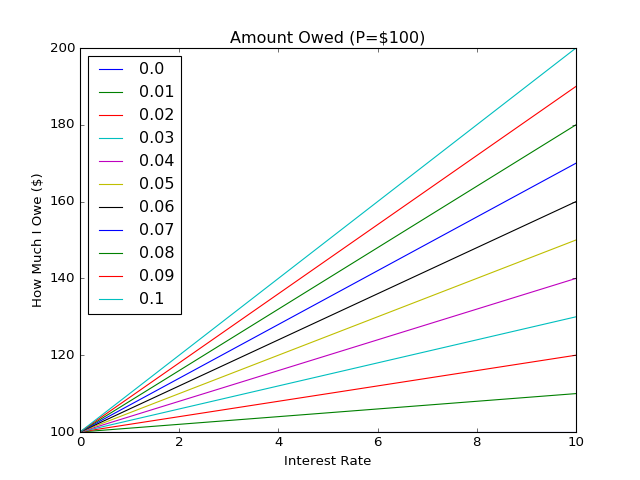

In [39]:
%matplotlib notebook
time = np.arange(0, 11, 1) # plot time between 0 and 10 years in increments of 1 year
rates = np.arange(0.0, 0.11, 0.01) # plot interest rates between 0 and 10% in increments of 1%
plt.xlabel('Interest Rate')
plt.ylabel('How Much I Owe ($)')
title = 'Amount Owed (P=$' + str(P) + ')' 
plt.title(title)
for rate in rates:
    plt.plot(time, F_simple(P,rate,time), label=rate)
plt.legend(loc=2)
plt.show()

## Growth With Compounding Interest

In a compounding interest scenario, the future value of money is _compounded_ at each period. That is, after each period (e.g. each year) the total amount owed is note and then interest is applied to that amount. After the first period, the borrower is racking up additional interest on the interest that they owe. The equation is like this:

$$F=P(1+i)^N$$


### Question: What kind of equation is the compounding interest equation?
For the compounding interest form of F(P, i, N) in the equation above, what kind of relationship does the future value of money (F) have with time (N):

- quadratic
- linear
- logarithmic
- exponential


In [40]:
def F_compound(P, i, N):
    '''Growth with compounding interest'''
    return P*pow((1+i),N)

In [41]:
print("You give me $"+str(P)+" today, but after " + str(N) +
      " years at an interest rate of " + str(i) + ", I will owe you:")
print(F_compound(P, i, N))

You give me $100 today, but after 10 years at an interest rate of 0.1, I will owe you:
259.3742460100002


<IPython.core.display.Javascript object>


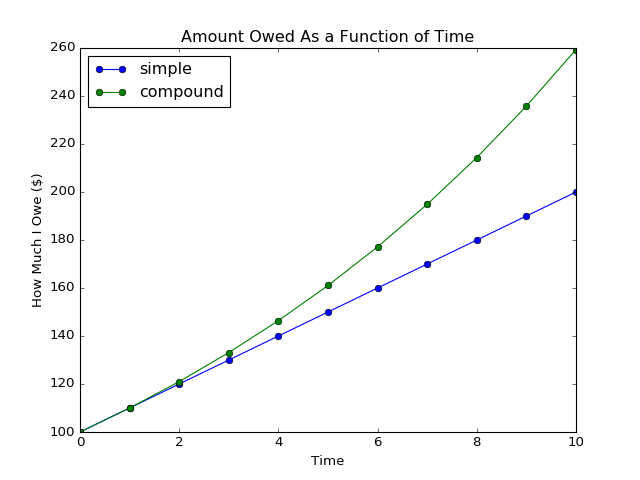

In [42]:
# Plot it as a function of interest rate
%matplotlib notebook
time = np.arange(0, 11, 1) 
plt.xlabel('Time')
plt.ylabel('How Much I Owe ($)')
plt.title('Amount Owed As a Function of Time')
plt.plot(time, F_simple(P,i,time), 'bo-', label="simple")
plt.plot(time, F_compound(P,i,time), 'go-', label="compound")
plt.legend(loc=2)
plt.show()

<IPython.core.display.Javascript object>


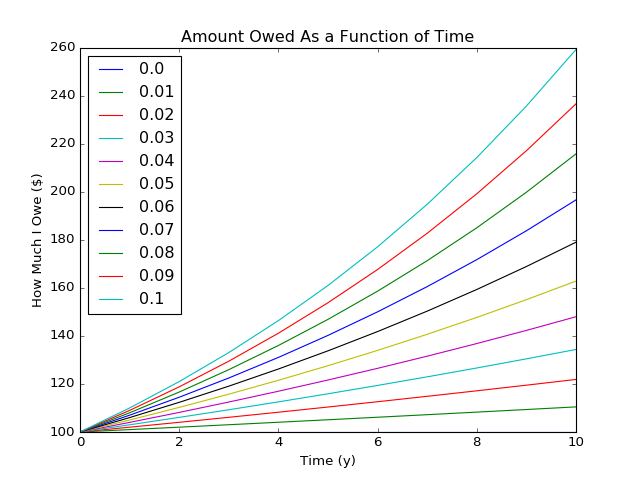

In [36]:
# Plot it for different interest rates
%matplotlib notebook
time = np.arange(0, 11, 1) 
rates = np.arange(0.0, 0.11, 0.01) 
plt.xlabel('Time (y)')
plt.ylabel('How Much I Owe ($)')
plt.title('Amount Owed As a Function of Time')
for rate in rates:
    plt.plot(time, F_compound(P,rate,time), label=rate)
plt.legend(loc=2)
plt.show()

## Discounting

Our examples have shown the growth in an investment due to interest earned. 
Compounding is a way to move money from the present to the future. 
What about going the other way in time, that is, **what is the value of the 
promise of some future amount worth today?** The answer is provided by the 
_inverse_ of compounding, **discounting**.

$$F=\mbox{Future value}$$
$$P=\mbox{Present value}$$
$$N=\mbox{Number of periods}$$
$$i=\mbox{Investment rate per period}$$

Recall that F, as a function of P, is :

$$F = P(1+i)^N$$

Solving this for P, as a function of F, we get:

$$P = \frac{F}{(1+i)^N}$$


In [43]:
def P_compound(F, i, N):
    """The present value, as a function of future value, for compounding interest"""
    return F/pow((1+i),N)

In [59]:
# example
F=100  # I promise you $100
i=0.10 # at 10 percent investment per period
N=10   # but you have to wait 10 periods before I give it to you

print("If you invest " + 
      str(P_compound(F, i, N)) + " today at an investment rate of " + str(i*100) +
      "%, it will be worth $" + str(F) +
      " in " + str(N) + " years.")


If you invest 38.55432894295314 today at an investment rate of 10.0%, it will be worth $100 in 10 years.


In [60]:
# Exercise... Show that P_compound is truly the inverse of F_compound
i = 0.1
N = 10
test_values = [10, 100, 1000]

for f_test in test_values:
    P = P_compound(f_test,i,N)
    obs = F_compound(P, i, N)
    assert(obs == f_test)
    print(obs," = ",f_test)

10.0  =  10
100.0  =  100
1000.0  =  1000


# Inflation

Inflation is the tendency for prices to continuously rise. Conversely, it is the continuous fall in the value of currency (like the dollar).

**Example:** What has happened to the value of the dollar since you entered college (4 yrs)? To answer this, we need inflation rates for 2013‐2016:

 - 2013: 1.5%
 - 2014: 1.6%
 - 2015: 0.1% 
 - 2016: 1.0%
 
$$F = \mbox{buying power today}$$
$$P = \mbox{one dollar in your first year of college}$$
$$i_n = \mbox{inflation rate in year n.}$$
$$F_{n+1} = P_n(1 +i_n)$$

$$F_{2016} = P_{2015}(1 + i_{2016})$$
$$F_{2015} = P_{2014}(1 + i_{2015})$$
$$F_{2014} = P_{2013}(1 + i_{2014})$$

Combined:

$$F_{2016} = P_{2013}(1 + i_{2013})(1 + i_{2014})(1 + i_{2015})(1 + i_{2016})$$


In [73]:
def F_infl(P, infl):
    """The future value of money, due to one year of inflation at rate infl"""
    return P*(1+infl)

import collections
year_infl = collections.OrderedDict()
#year_infl[2011] = 0.03
#year_infl[2012] = 0.017
year_infl[2013] = 0.015
year_infl[2014] = 0.016
year_infl[2015] = 0.001
year_infl[2016] = 0.01

P = {2013:1}
F = {}
for year, infl in year_infl.items():
    P[year+1] = F_infl(P[year], infl)
    F[year] = P[year+1]
    
print(F[2016])
    

1.0425939523999999


## MARR – minimum acceptable rate of return

- You know F and N and are asking for a value of P. But what is the value of i? As an investor you must specify the rate of return that you require.
- We call the interest rate in the computation the minimal acceptable rate of return, MARR

MARR depends on many things; how much capital is available, how much is needed, etc.
- For an individual, it should be at least what could be earned elsewhere.
- For someone with debt, it should be at least the interest charged by the lender.

Let’s say you are a student with a credit card debt charging 1.5% per month on the outstanding balance. That is roughly 18% per year. Your friend Feynman wants to borrow some money. Feynman will give you $100 in one year. How much should you be willing to loan him?

In [62]:
F=100
N=1
i = 0.18
P = P_compound(F, i, N)
print(P)

84.74576271186442


If your MARR is greater than 18%, the amount you should be willing to give should be less than P. If your MARR is less Than 18%, you could give more.

### Exercise: Formulate an equation for $i_{MARR}$
To get $i_{MARR}$ as a function of P and F, you must solve F_{compound} for i.


In the following markdown cell, replace the question marks with the appropriate equation:


$$i_{MARR} = ???$$

### Excercise: Write the $i_{MARR}$ equation as a python function

In the following python cell, fill in the function:

In [77]:
def i_MARR(F, P, N):
    """The $i_{MARR}$ as a function of future value, present value, and period, for compounding interest"""
    return #your function here


## What about borrowing money?

Sometimes, the rate at which we make payments is different than the period over which the rate is quoted and compounded. For a car loan, for example, the compounding period is annual, but you make monthly payments for some $m$ months.

$$F = \frac{m}{12}\left(\frac{Pi}{1-(1+i/12)^{-m}}\right)$$


In [3]:
def F_monthly(P, i, m):
    F = (m/12)*(P*i)/(1 - pow(1+i/12,-m))
    print("Total: ",F)
    print("Monthly payment: ", F/m)
    print("Interest paid: ", F-P)
    
    

### Example : Car Loan

- Let’s use an example of a $20,000 loan so you can buy a car.
- The current interest rate is 4% on a 60 month loan.

In [4]:
# How much do you pay per month?
# Over the course of the 60 months, how much interest have you paid?

m=60
i=0.04
P=20000.0
    
F = F_monthly(P, i, m)



Total:  22099.826466319162
Monthly payment:  368.3304411053194
Interest paid:  2099.826466319162


### Example : Home Loan

Now lets look longer term. It's time to buy a house. The average price of a home sold in the US in June 2014 was $331,000$. Let's say you get a 15 year fixed rate mortgage at 3.25%. 

In [5]:
N=15
m=15*12
i=0.0325
P=331000.

F = F_monthly(P, i, m)

Total:  418650.05252246873
Monthly payment:  2325.833625124826
Interest paid:  87650.05252246873


In [6]:
N=15
m=15*12
i=0.031
P=370000.

F = F_monthly(P, i, m)

Total:  463137.2410848306
Monthly payment:  2572.9846726935034
Interest paid:  93137.2410848306


In [81]:
# what about at 6.5 percent?
i=0.065

F = F_monthly(P, i, m)


Total:  519005.76824417035
Monthly payment:  2883.36537913428
Interest paid:  188005.76824417035


In [82]:
# Same house, $331,000, 30 yr fixed rate 4.25%
N=30
m=N*12
i=0.0425

F = F_monthly(P, i, m)

Total:  586195.5742103038
Monthly payment:  1628.3210394730663
Interest paid:  255195.57421030384


In [83]:
# How about at 6.5% interest? 
i=0.065

F = F_monthly(P, i, m)

Total:  753172.2567942174
Monthly payment:  2092.145157761715
Interest paid:  422172.2567942174


### Exercise: Paying down the principal

Okay, so, those big banks don't need all your money. It would be great to take their nice low interest rate and pay off the principle as quickly as possible so you aren't paying interest on top of quite so much interest. In buying houses, sometimes a bank won't even charge a fee for paying off your loan faster than intended. Can you derive a formula for how much this kind of behavior will save you? In the case of the mortgate above, let's assume you pay an extra \$50 a month, every month. How much faster could you pay off your loan? How much money do you save?

In [85]:
# do your calculations here

## Key Lessons

We have covered the following key concepts today:

- \$x today is more valuable than \$x tomorrow (time value of money)
- The future value with simple interest is $F_{simple} =  P(1+iN)$
- The future value with compounding interest is $F_{compound} = P(1+i)^N$
- The principle P required to acheive a certain F is $P_{compound} = \frac{F}{(1+i)^N}$
- Inflation is a direct result of the time value of money and can be derived from $F_{simple}$
- $i_{MARR}$ is the lowest interest rate $i$ one is willing to get for investing their money, given known $F$ and $P$.
- Amortized payments (like monthly car payments) make this whole thing much more complex.


## Next Class

Next time, we'll be talking about :

- The amount of nuclear energy used in the world
- The share of the market domestically and abroad
- Electricity imports
- 

